In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("Online Retail.csv", encoding='ISO-8859-1')
df

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [110]:
df.rename(columns={'ï»¿InvoiceNo': 'InvoiceNo'}, inplace=True)

In [123]:
df.dropna(subset=['CustomerID'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [127]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [130]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [131]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
ref_date

Timestamp('2011-12-10 12:50:00')

In [141]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,   
    'InvoiceNo': 'nunique',                               
    'TotalPrice': 'sum'                                   
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,278,1,180.60
4335,18281.0,181,1,80.82
4336,18282.0,8,2,178.05
4337,18283.0,4,16,2094.88


In [143]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,326,1,77183.60,1,1,4
1,12347.0,2,7,4310.00,4,4,4
2,12348.0,75,4,1797.24,2,3,4
3,12349.0,19,1,1757.55,3,1,4
4,12350.0,310,1,334.40,1,1,2
...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1
4335,18281.0,181,1,80.82,1,2,1
4336,18282.0,8,2,178.05,4,3,1
4337,18283.0,4,16,2094.88,4,4,4


In [145]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114
1,12347.0,2,7,4310.00,4,4,4,444
2,12348.0,75,4,1797.24,2,3,4,234
3,12349.0,19,1,1757.55,3,1,4,314
4,12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,121
4335,18281.0,181,1,80.82,1,2,1,121
4336,18282.0,8,2,178.05,4,3,1,431
4337,18283.0,4,16,2094.88,4,4,4,444


In [147]:
def segment_customer(row):
    if row['R_Score'] == 4 and row['F_Score'] == 4:
        return 'Loyal'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Engaged'
    elif row['R_Score'] == 1 and row['F_Score'] == 1:
        return 'Inactive'
    elif row['R_Score'] == 4:
        return 'New'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,4,114,Inactive
1,12347.0,2,7,4310.00,4,4,4,444,Loyal
2,12348.0,75,4,1797.24,2,3,4,234,Others
3,12349.0,19,1,1757.55,3,1,4,314,Others
4,12350.0,310,1,334.40,1,1,2,112,Inactive
...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,121,Others
4335,18281.0,181,1,80.82,1,2,1,121,Others
4336,18282.0,8,2,178.05,4,3,1,431,Engaged
4337,18283.0,4,16,2094.88,4,4,4,444,Loyal


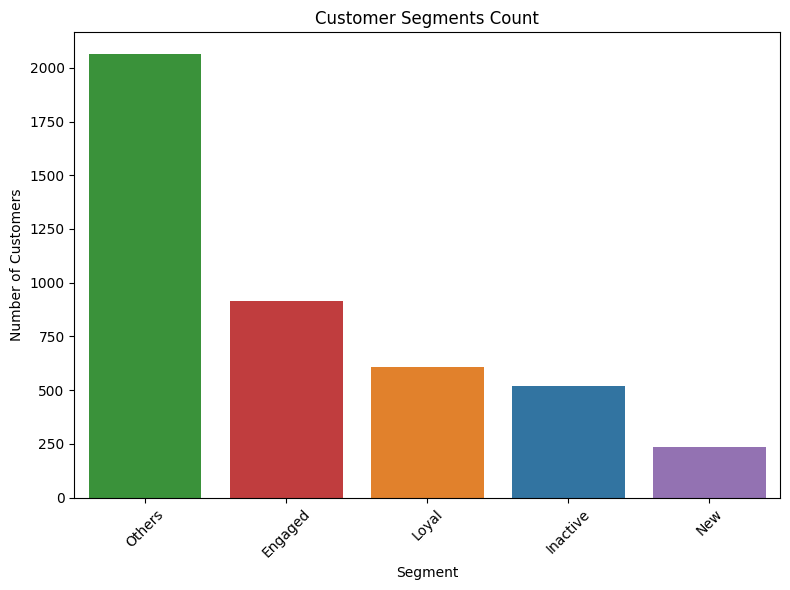

In [155]:
plt.figure(figsize=(8, 6))
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple
sns.countplot(
    x='Segment',
    hue='Segment',
    data=rfm,
    order=rfm['Segment'].value_counts().index,
    palette=custom_colors,
    legend=False
)
plt.title('Customer Segments Count')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

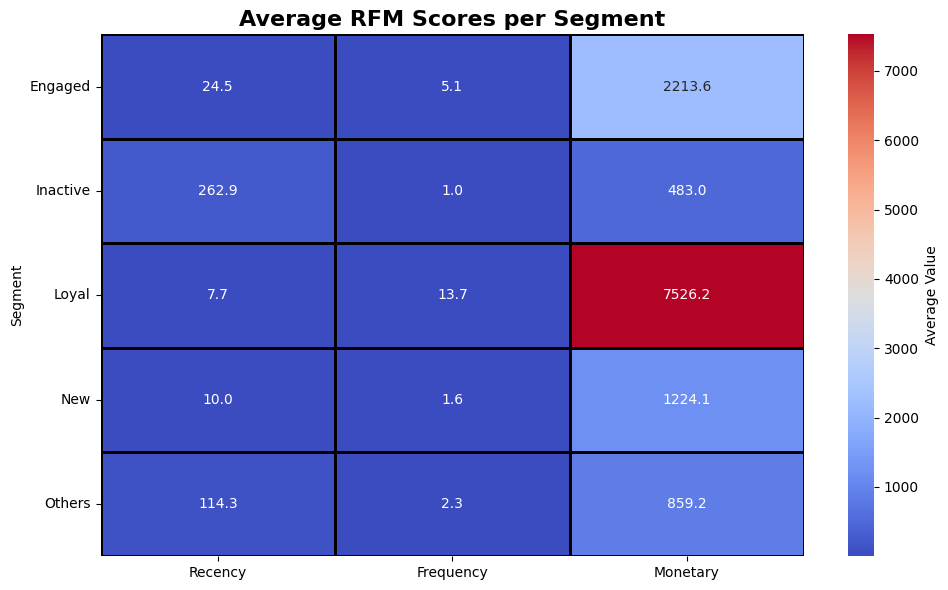

In [ ]:
heatmap_data = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

# Colorful Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',       
    linewidths=2,          
    linecolor='black',     
    cbar_kws={'label': 'Average Value'}  
)
plt.title('Average RFM Scores per Segment', fontsize=16, fontweight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()